# **EDA**

En el marco de este proyecto, se llevará a cabo un Análisis Exploratorio de Datos (EDA) sobre un conjunto de datos esencial que abarca información crucial sobre lesiones ocasionadas en siniestros viales ocurridos en la ciudad de Buenos Aires, durante el periodo comprendido desde el año 2019 hasta el año 2021. Este proceso tiene como objetivo principal preparar y organizar los datos para su posterior análisis, lo que permitirá obtener insights significativos que contribuyan a mejorar la seguridad vial en esta área geográfica específica. Asimismo, se realizará un análisis del dataset "homicidos", el cual contiene datos detallados sobre homicidios asociados a incidentes viales en la Ciudad, abarcando el período comprendido entre los años 2016 y 2021. Este conjunto de datos proporciona información crítica, incluyendo fechas, ubicaciones y tipos de transporte involucrados en cada evento, lo que permitirá un análisis exhaustivo para extraer conocimientos relevantes y establecer medidas preventivas eficaces.

Adicionalmente se ira comentando linea por linea, lo que esta sucediendo en cada linea de codigo, la razon por la que realizamos ese proceso de y un analisis de la informacion que presentaremos

## 1. Importacion de librerias

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Cargamos los datos

In [64]:
homcicidios_hechos = pd.read_csv('CSV\homicidios_hechos.csv')
homicidios_victimas = pd.read_csv('CSV\homicidios_victimas.csv')
lesiones_hechos = pd.read_csv('CSV\lesiones_hechos.csv')
lesiones_victimas = pd.read_csv('CSV\lesiones_victimas.csv')

In [65]:
homcicidios_hechos.head(3)

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,COMUNA,LATITUD,LONGITUD,VICTIMA,ACUSADO,AFECTADO_1,AFECTADO_2
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7.0,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO,MOTO,AUTO


In [66]:
homicidios_victimas.head(3)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0


In [67]:
lesiones_hechos.head(3)

,ID,N_VICTIMAS,FECHA,FRANJA_HORA,COMUNA,TIPO_DE_CALLE,LONGITUD,LATITUD,VICTIMA,ACUSADO,GRAVEDAD,AFECTADO_1,AFECTADO_2
0,LC-2019-0000179,1,2019-01-01,9.0,14,NaN,-58.408911,-34.559658,CICLISTA,NaN,NaN,CICLISTA,NaN
1,LC-2019-0000053,1,2019-01-01,1.0,8,NaN,-58.443510,-34.669125,AUTO,NaN,NaN,AUTO,NaN
2,LC-2019-0000063,1,2019-01-01,2.0,8,NaN,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN


In [68]:
lesiones_victimas.head(3)

,ID_hecho,FECHA,VEHICULO_VICTIMA,SEXO,EDAD,GRAVEDAD
0,LC-2019-0000053,2019-01-01,NAN,MASCULINO,57.0,NAN
1,LC-2019-0000063,2019-01-01,NAN,NAN,NaN,NAN
2,LC-2019-0000079,2019-01-01,NAN,MASCULINO,NaN,NAN


# 4. Unimos las tablas de hechos y de victimas para estandarizar la información

In [69]:
# Usamos el metodo concat por que al tener dimensiones diferentes el Join genera errores

hechos = pd.concat([homcicidios_hechos, lesiones_hechos], ignore_index=True)
hechos.head(2)

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,COMUNA,LATITUD,LONGITUD,VICTIMA,ACUSADO,AFECTADO_1,AFECTADO_2,FRANJA_HORA,GRAVEDAD
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,MOTO,AUTO,NaN,NaN
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,AUTO,PASAJEROS,NaN,NaN


In [70]:
victimas = pd.concat([homicidios_victimas, lesiones_victimas], ignore_index=True)
victimas.head(3)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA,VEHICULO_VICTIMA,GRAVEDAD
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,NaN,NaN,NaN
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0,NaN,NaN,NaN
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0,NaN,NaN,NaN


## 5. Transformaciones y exploracion de datos

In [71]:
# Creamos una función que nos permita calcular los datos duplicados para los dataframes

def porcentaje_valores_duplicados(dataframe, columna):
    total_filas = len(dataframe)
    valores_duplicados = dataframe.duplicated(subset=[columna]).sum()
    porcentaje_duplicados = (valores_duplicados / total_filas) * 100
    print(f"Porcentaje de valores duplicados en la columna '{columna}': {porcentaje_duplicados:.2f}%")

In [72]:
# Creamos una función que nos permita calcular los datos nulos para los dataframes
def porcentaje_valores_nulos(dataframe):
    total_filas = len(dataframe)
    print("Porcentaje de valores nulos por columna:")
    for columna in dataframe.columns:
        valores_nulos = dataframe[columna].isnull().sum()
        porcentaje_nulos = (valores_nulos / total_filas) * 100
        print(f"{columna}: {porcentaje_nulos:.2f}%")

    total_valores_nulos = dataframe.isnull().sum().sum()
    porcentaje_total_nulos = (total_valores_nulos / (total_filas * len(dataframe.columns))) * 100
    print(f"\nTotal de valores nulos en el DataFrame: {total_valores_nulos}")
    print(f"Porcentaje total de valores nulos en el DataFrame: {porcentaje_total_nulos:.2f}%")

In [73]:
porcentaje_valores_duplicados(victimas, 'ID_hecho')

Porcentaje de valores duplicados en la columna 'ID_hecho': 13.56%


In [74]:
porcentaje_valores_duplicados(hechos, 'ID')

Porcentaje de valores duplicados en la columna 'ID': 0.00%


In [75]:
porcentaje_valores_nulos(victimas)

Porcentaje de valores nulos por columna:
ID_hecho: 0.00%
FECHA: 97.47%
ROL: 97.51%
VICTIMA: 97.50%
SEXO: 0.02%
EDAD: 15.97%
FECHA : 2.53%
VEHICULO_VICTIMA: 2.53%
GRAVEDAD: 2.53%

Total de valores nulos en el DataFrame: 89516
Porcentaje total de valores nulos en el DataFrame: 35.12%


In [76]:
porcentaje_valores_nulos(hechos)

Porcentaje de valores nulos por columna:
ID: 0.00%
N_VICTIMAS: 0.00%
FECHA: 0.00%
HH: 97.16%
TIPO_DE_CALLE: 45.12%
COMUNA: 4.15%
LATITUD: 6.01%
LONGITUD: 6.01%
VICTIMA: 43.88%
ACUSADO: 62.54%
AFECTADO_1: 43.84%
AFECTADO_2: 62.52%
FRANJA_HORA: 2.88%
GRAVEDAD: 97.36%

Total de valores nulos en el DataFrame: 115419
Porcentaje total de valores nulos en el DataFrame: 33.68%


In [77]:
# Encuentra los duplicados basados en la columna 'ID_hecho' y todos los valores de las columnas
duplicados = victimas[victimas.duplicated(subset=None, keep=False)]

# Encuentra los duplicados basados únicamente en la columna 'ID_hecho'
duplicados_id_hecho = duplicados[duplicados.duplicated(subset=['ID_hecho'], keep=False)]

# Encuentra los duplicados basados únicamente en el contenido de las filas
duplicados_completos = duplicados_id_hecho[duplicados_id_hecho.duplicated(subset=None, keep=False)]

# Filtra los duplicados completos del DataFrame original
victimas = victimas.drop_duplicates(subset=None, keep=False)

# Filtra los posibles duplicados del DataFrame original
posibles_duplicados = duplicados_id_hecho.drop_duplicates(subset=None, keep=False)

In [78]:
posibles_duplicados.head(3)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA,VEHICULO_VICTIMA,GRAVEDAD


In [79]:
victimas.head(2)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA,VEHICULO_VICTIMA,GRAVEDAD
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,NaN,NaN,NaN
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0,NaN,NaN,NaN


## 6. Información relevante

### 6.1 Dataframe Victimas

In [80]:
victimas.describe()

,EDAD
count,23071.000000
mean,37.859434
std,15.392044
min,0.000000
25%,27.000000
50%,35.000000
75%,46.000000
max,100.000000


El análisis detallado de la información proporcionada sobre las víctimas de siniestros viales se puede desglosar de la siguiente manera:

1. **Cantidad de Datos (count):** Hay un total de 23,071 registros de víctimas de siniestros viales en el conjunto de datos.

2. **Media (mean):** La edad media de las víctimas es de aproximadamente 37.86 años. Esto indica que, en promedio, las personas involucradas en siniestros viales tienen alrededor de 38 años.

3. **Desviación Estándar (std):** La desviación estándar de las edades de las víctimas es de aproximadamente 15.39 años. Esta medida proporciona una idea de la dispersión de las edades en el conjunto de datos. Una desviación estándar alta sugiere una mayor variabilidad en las edades de las víctimas.

4. **Edad Mínima (min):** La edad mínima registrada en las víctimas es de 0 años. Esto podría indicar que hay casos de víctimas muy jóvenes, posiblemente incluso recién nacidos, involucrados en los siniestros viales. De igual manera se considera la posibilidad de la existencia de valores outliers, que se verificaran posteriormente.

5. **Percentiles (25%, 50%, 75%):** Estos percentiles proporcionan información sobre la distribución de las edades de las víctimas en el conjunto de datos.
   - El 25% de las víctimas tienen una edad igual o inferior a 27 años.
   - El 50% de las víctimas tienen una edad igual o inferior a 35 años (mediana).
   - El 75% de las víctimas tienen una edad igual o inferior a 46 años.

6. **Edad Máxima (max):** La edad máxima registrada en las víctimas es de 100 años. Esto indica que incluso personas mayores están involucradas en los siniestros viales. De igual manera se considera la posibilidad de la existencia de valores outliers, que se verificaran posteriormente.

Conclusión:
- El análisis detallado de estas estadísticas revela que las víctimas de siniestros viales abarcan una amplia gama de edades, desde recién nacidos hasta personas mayores de 100 años.
- La edad media de las víctimas es de aproximadamente 38 años, pero la dispersión en las edades es notable, como lo indica la desviación estándar.
- Los percentiles proporcionan información sobre la distribución de las edades de las víctimas, mostrando que una proporción significativa de ellas son jóvenes adultos, pero también hay una cantidad considerable de personas mayores y jóvenes involucradas en los siniestros viales.

In [82]:
# Creamos una función para identificar valores outliers
def identificar_outliers(dataframe, columna):
    Q1 = dataframe[columna].quantile(0.25)
    Q3 = dataframe[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[columna] < limite_inferior) | (dataframe[columna] > limite_superior)]
    return outliers

In [84]:
outliers_edad = identificar_outliers(victimas, 'EDAD')
print("Valores outliers de la columna 'EDAD':")
outliers_edad

Valores outliers de la columna 'EDAD':


,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA,VEHICULO_VICTIMA,GRAVEDAD
37,2016-0050,2016-04-19,PEATON,PEATON,MASCULINO,78.0,NaN,NaN,NaN
42,2016-0055,2016-04-25,PEATON,PEATON,MASCULINO,79.0,NaN,NaN,NaN
60,2016-0082,2016-06-27,PEATON,PEATON,MASCULINO,87.0,NaN,NaN,NaN
61,2016-0083,2016-06-28,PEATON,PEATON,FEMENINO,76.0,NaN,NaN,NaN
64,2016-0086,2016-06-30,PEATON,PEATON,MASCULINO,75.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28224,LC-2021-0139205,NaN,NaN,NaN,FEMENINO,78.0,2021-03-27,NAN,GRAVE
28241,LC-2021-0145102,NaN,NaN,NaN,MASCULINO,78.0,2021-03-30,MOTO,NAN
28275,LC-2021-0100636,NaN,NaN,NaN,MASCULINO,90.0,2021-03-05,PEATON,GRAVE
28286,LC-2021-0518069,NaN,NaN,NaN,FEMENINO,77.0,2021-10-19,PEATON,NAN


<Axes: xlabel='EDAD'>

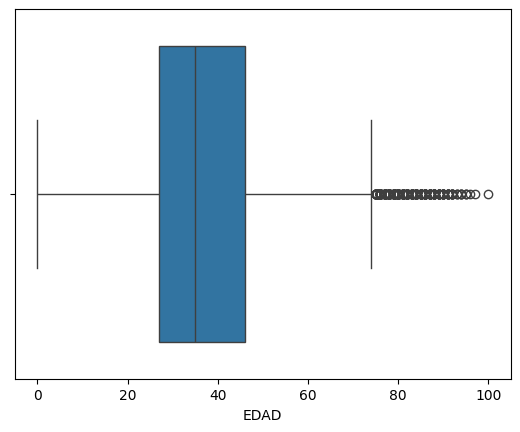

In [87]:
sns.boxplot(x=victimas['EDAD'])

In [85]:
outliers_edad['EDAD'].value_counts()

EDAD
75.0     73
76.0     71
80.0     67
78.0     56
79.0     49
77.0     49
81.0     40
82.0     40
84.0     38
83.0     31
87.0     24
85.0     23
86.0     21
88.0     12
89.0     12
90.0     10
91.0      8
92.0      7
94.0      4
95.0      3
93.0      3
97.0      1
96.0      1
100.0     1
Name: count, dtype: int64

### Visualizacion de los datos dataframe Victimas

In [95]:
sns.set_palette("colorblind")

# Graficamos la información importante de cada columna
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0, 0.5, 'Frecuencia')

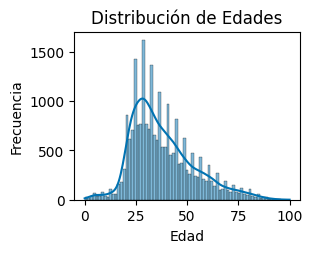

In [96]:
# Histograma de edades
plt.subplot(2, 2, 1)
sns.histplot(victimas['EDAD'].dropna(), kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

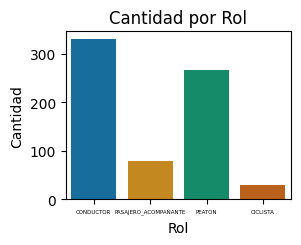

In [119]:
# Gráfico de barras de roles
plt.subplot(2, 2, 2)
sns.countplot(x='ROL', data=victimas, hue='ROL', palette='colorblind', legend=False)
plt.title('Cantidad por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad')

plt.xticks(fontsize=4)

plt.show()

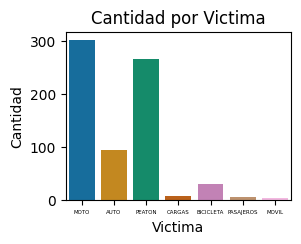

In [138]:
# Gráfico de barras de la frecuencia de los valores en la columna 'VICTIMA' con colores diferentes
plt.subplot(2, 2, 2)
sns.countplot(x='VICTIMA', data=victimas, hue='VICTIMA', palette='colorblind', legend=False)
plt.title('Cantidad por Victima')
plt.xlabel('Victima')
plt.ylabel('Cantidad')

plt.xticks(fontsize=4)

plt.show()

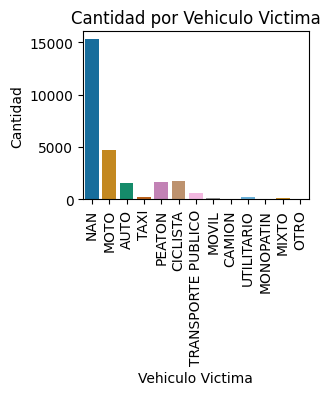

In [141]:
# Gráfico de barras de la frecuencia de los valores en la columna 'VEHICULO_VICTIMA' con colores diferentes
plt.subplot(2, 2, 2)
sns.countplot(x='VEHICULO_VICTIMA', data=victimas, hue='VEHICULO_VICTIMA', palette='colorblind', legend=False)
plt.title('Cantidad por Vehiculo Victima')
plt.xlabel('Vehiculo Victima')
plt.ylabel('Cantidad')

plt.xticks(rotation=90)  # Rotar los nombres de las columnas en 90 grados

plt.show()

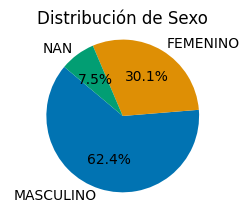

In [120]:
# Gráfico circular de sexo
plt.subplot(2, 2, 3)
sexo_counts = victimas['SEXO'].value_counts()
plt.pie(sexo_counts.values, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("colorblind"))
plt.title('Distribución de Sexo')
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse
plt.show()

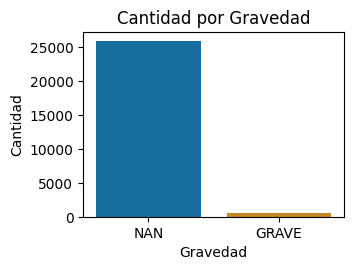

In [124]:
# Gráfico de barras de gravedad
plt.subplot(2, 2, 4)
sns.countplot(x='GRAVEDAD', data=victimas, hue='GRAVEDAD', palette='colorblind', legend=False)
plt.title('Cantidad por Gravedad')
plt.xlabel('Gravedad')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

### Análisis de las Gráficas:

#### Gráfica 2: Porcentaje de Víctimas según Rol en el Siniestro Vial

La gráfica revela que el rol predominante entre las víctimas de siniestros viales es el de conductor, representando un 47.41% del total de casos analizados. Le sigue en frecuencia el rol de peatón, con un 38.36% de las víctimas. Estos datos sugieren una propensión significativa hacia la victimización de conductores, posiblemente asociada con la exposición inherente a la conducción, así como la vulnerabilidad de los peatones en entornos viales.

#### Gráfica 3: Cantidad de Víctimas según Tipo de Vehículo Involucrado

La representación visual indica que la mayor cantidad de víctimas está relacionada con motocicletas, abarcando aproximadamente 42.66% del total de casos. Seguidamente, los ciclistas constituyen un 15.76% significativo de las víctimas y muy cercano al valor anterior contamos con los peatones que constituyen un 15.04%. Este hallazgo sugiere una preocupante incidencia de accidentes relacionados con motocicletas, lo que podría atribuirse a factores como la falta de protección pasiva y la exposición inherente a este medio de transporte. Asimismo, destaca la vulnerabilidad de los peatones en entornos viales, lo que demanda medidas específicas de seguridad y prevención.

#### Hallazgos Adicionales:

- La mayoría de los vehículos de las víctimas implicadas son motocicletas, lo que subraya la importancia de abordar la seguridad en este tipo de vehículos para reducir la incidencia de accidentes graves.
  
- El análisis demográfico revela una disparidad de género, con un 62.4% de las víctimas identificadas como hombres y un 30.1% como mujeres. Esta diferencia podría implicar patrones de comportamiento y exposición distintos entre los géneros, lo cual requiere una investigación más profunda para implementar medidas de prevención específicas y equitativas.

### Conclusiones:

El análisis detallado de estas gráficas proporciona una comprensión más completa de las características de las víctimas de siniestros viales. La predominancia de conductores y peatones como roles principales, así como la alta incidencia de motocicletas como vehículos involucrados, destacan áreas críticas que requieren atención en las políticas de seguridad vial. Asimismo, la disparidad de género en las víctimas subraya la necesidad de abordar las diferencias en los patrones de exposición y riesgo entre hombres y mujeres para promover un entorno vial más seguro y equitativo.

In [81]:
hechos.describe()

,N_VICTIMAS,HH,FRANJA_HORA
count,24481.000000,695.000000,23776.000000
mean,1.156856,11.657554,13.611036
std,0.544944,6.700090,5.550877
min,0.000000,0.000000,0.000000
25%,1.000000,6.000000,10.000000
50%,1.000000,11.000000,14.000000
75%,1.000000,17.500000,18.000000
max,16.000000,23.000000,23.000000


Para analizar estos datos, primero necesitamos entender qué representan las columnas:

- `N_VICTIMAS`: Número de víctimas involucradas en cada incidente.
- `HH`: Hora del día en la que ocurrió el incidente, representada como un número entero del 0 al 23.
- `FRANJA_HORA`: Franja horaria en la que ocurrió el incidente.

Ahora, procederemos a analizar cada una de las columnas y sus estadísticas descriptivas:

### Número de Víctimas (`N_VICTIMAS`):
- **Count (Recuento)**: Hay un total de 24,481 incidentes registrados en el dataset.
- **Media (Mean)**: En promedio, hay aproximadamente 1.16 víctimas involucradas por incidente.
- **Desviación Estándar (Std)**: La desviación estándar es de aproximadamente 0.54, lo que indica que la dispersión de los datos alrededor de la media es relativamente baja.
- **Mínimo (Min)**: El menor número de víctimas en un incidente es 0.
- **Percentiles (25%, 50%, 75%)**: El 25% de los incidentes tienen al menos 1 víctima, el 50% de los incidentes tienen al menos 1 víctima y el 75% de los incidentes tienen al menos 1 víctima.
- **Máximo (Max)**: El máximo número de víctimas en un incidente es 16.

### Hora del Día (`HH`):
- **Count (Recuento)**: Hay 695 registros válidos para la hora del día.
- **Media (Mean)**: La media de la hora del día en que ocurren los incidentes es aproximadamente 11.66, lo que sugiere que los incidentes tienden a ocurrir alrededor del mediodía.
- **Desviación Estándar (Std)**: La desviación estándar es de aproximadamente 6.70, lo que indica que hay una variabilidad significativa en las horas en que ocurren los incidentes.
- **Mínimo (Min)**: La hora mínima registrada es 0, lo que indica medianoche.
- **Percentiles (25%, 50%, 75%)**: El 25% de los incidentes ocurren antes de las 6 am, el 50% ocurren antes de las 11 am y el 75% ocurren antes de las 5:30 pm.
- **Máximo (Max)**: La hora máxima registrada es 23, lo que indica las 11 pm.

### Franja Horaria (`FRANJA_HORA`):
- **Count (Recuento)**: Hay 23,776 registros válidos para la franja horaria.
- **Media (Mean)**: La media de la franja horaria en la que ocurren los incidentes es aproximadamente 13.61, lo que indica que en promedio los incidentes tienden a ocurrir por la tarde.
- **Desviación Estándar (Std)**: La desviación estándar es de aproximadamente 5.55, lo que indica una variabilidad moderada en las franjas horarias de los incidentes.
- **Mínimo (Min)**: La franja horaria mínima registrada es 0, que corresponde a la medianoche.
- **Percentiles (25%, 50%, 75%)**: El 25% de los incidentes ocurren antes de las 10 am, el 50% ocurren antes de las 2 pm y el 75% ocurren antes de las 6 pm.
- **Máximo (Max)**: La franja horaria máxima registrada es 23, que corresponde a las 11 pm.

### Conclusiones:
- La mayoría de los incidentes tienen una sola víctima, pero algunos tienen hasta 16 víctimas.
- Los incidentes tienden a ocurrir alrededor del mediodía, con una variabilidad significativa en las horas en que ocurren.
- En promedio, los incidentes tienden a ocurrir por la tarde, pero también hay una variabilidad moderada en las franjas horarias de los incidentes.

In [144]:
hechos.head(2)

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,COMUNA,LATITUD,LONGITUD,VICTIMA,ACUSADO,AFECTADO_1,AFECTADO_2,FRANJA_HORA,GRAVEDAD
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,MOTO,AUTO,NaN,NaN
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,AUTO,PASAJEROS,NaN,NaN


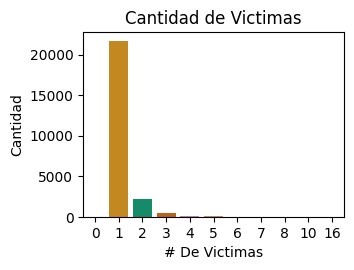

In [147]:
# Gráfico de barras de gravedad
plt.subplot(2, 2, 4)
sns.countplot(x='N_VICTIMAS', data=hechos, hue='N_VICTIMAS', palette='colorblind', legend=False)
plt.title('Cantidad de Victimas')
plt.xlabel('# De Victimas')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

Análisis de los Resultados
A continuación, se presenta un análisis detallado de los datos:

Número de Víctimas Únicas:

La mayoría de los siniestros viales involucran una sola víctima, representando el 95.9% de los casos.
Para las situaciones con dos víctimas, constituyen el 10% de los registros, lo que indica una proporción significativamente menor en comparación con los casos de una sola víctima.
A medida que aumenta el número de víctimas, la frecuencia disminuye drásticamente. Por ejemplo, solo el 1.9% de los siniestros viales involucran tres víctimas, mientras que menos del 0.6% involucran cuatro o más víctimas.
Siniestros con Cero Víctimas:

Existe un único registro donde no se reportan víctimas. Aunque son casos raros, no se pueden descartar, y es importante investigar más a fondo las circunstancias detrás de tales incidentes para comprender las causas y prevenir futuros siniestros.
Implicaciones en la Seguridad Vial:

La alta incidencia de siniestros viales con una sola víctima sugiere la necesidad de medidas preventivas dirigidas a conductores individuales y factores de riesgo específicos.
Por otro lado, los siniestros con múltiples víctimas, aunque menos frecuentes, pueden tener consecuencias más graves y requieren intervenciones más complejas para mitigar los riesgos.
Conclusiones y Recomendaciones
Este análisis destaca la importancia de abordar la seguridad vial desde múltiples perspectivas, considerando tanto los siniestros con una sola víctima como aquellos con múltiples víctimas.
Se recomienda llevar a cabo estudios adicionales para comprender mejor los factores subyacentes que contribuyen a diferentes niveles de gravedad en los siniestros viales.
Basándose en estos hallazgos, las autoridades de tránsito y los responsables de la seguridad vial pueden diseñar e implementar estrategias más efectivas para prevenir y reducir la incidencia de siniestros viales en la comunidad.

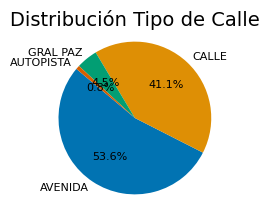

In [155]:
# Gráfico circular de Tipo de Calle
plt.subplot(2, 2, 3)
calle_counts = hechos['TIPO_DE_CALLE'].value_counts()
plt.pie(calle_counts.values, labels=calle_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("colorblind"), textprops={'fontsize': 8})
plt.title('Distribución Tipo de Calle', fontsize=14)
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse
plt.show()

***Análisis de los Datos sobre el Tipo de Calle en los Siniestros Viales:***

Según los datos proporcionados, se observa una distribución desigual en cuanto al tipo de calle donde ocurren los siniestros viales. Las avenidas representan la mayoría de los casos, con un total de 7204 incidentes registrados, seguidas por las calles, con 5519 incidentes. La autopista y la General Paz, por otro lado, muestran una incidencia relativamente menor, con 110 y 603 incidentes respectivamente.

**Interpretación y Consideraciones:**

Avenidas y Calles: La alta incidencia de siniestros viales en avenidas y calles podría estar relacionada con una mayor densidad de tráfico y una mayor interacción entre vehículos y peatones en entornos urbanos.

**Autopistas y General Paz:**

La menor cantidad de incidentes en autopistas y la General Paz podría atribuirse a un menor volumen de tráfico, así como a regulaciones de velocidad más estrictas y un diseño vial más seguro, como barreras de contención y separación de sentidos.

**Conclusiones:**

El análisis de la distribución de siniestros viales por tipo de calle revela áreas prioritarias para la implementación de medidas de seguridad vial. La concentración de incidentes en avenidas y calles resalta la necesidad de mejorar la infraestructura y las regulaciones de tráfico en entornos urbanos para reducir la incidencia de accidentes. Por otro lado, la menor frecuencia de siniestros en autopistas y vías de alta velocidad sugiere la efectividad de medidas de seguridad específicas en este tipo de carreteras, lo que podría servir como modelo para mejorar la seguridad en otros contextos viales.

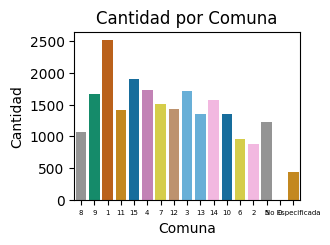

In [162]:
# Gráfico de barras de la frecuencia de los valores en la columna 'COMUNA' con colores diferentes
plt.subplot(2, 2, 2)
sns.countplot(x='COMUNA', data=hechos, hue='COMUNA', palette='colorblind', legend=False)
plt.title('Cantidad por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad')

plt.xticks(fontsize=5)

plt.show()

***Análisis de los Datos sobre la Comuna en los Siniestros Viales:***

**Distribución de Víctimas por Comuna**

Los datos proporcionados muestran una distribución significativa de víctimas de siniestros viales entre las diferentes comunas. Las comunas 1, 15, 4, 3 y 9 representan aproximadamente el 10.31%, 7.79%, 7.06%, 7.01% y 6.83% del total de casos respectivamente. Estas cifras destacan la variabilidad en la incidencia de siniestros viales entre las distintas áreas de la ciudad.

**Interpretación y Consideraciones:**

Comunas con Mayor Incidencia: Las comunas con mayor porcentaje de casos pueden estar asociadas con una mayor densidad de población, un mayor volumen de tráfico vehicular o características geográficas que aumentan el riesgo de accidentes, como intersecciones complejas o zonas de alto tránsito peatonal.

**Conclusiones:**
El análisis porcentual de la distribución de víctimas por comuna destaca áreas geográficas donde se concentra la incidencia de siniestros viales, lo que sugiere la importancia de implementar medidas de seguridad vial específicas en estas áreas. Además, la identificación y corrección de inconsistencias en los datos son pasos fundamentales para garantizar la integridad y fiabilidad del análisis, así como para informar de manera precisa las decisiones y políticas relacionadas con la seguridad vial.

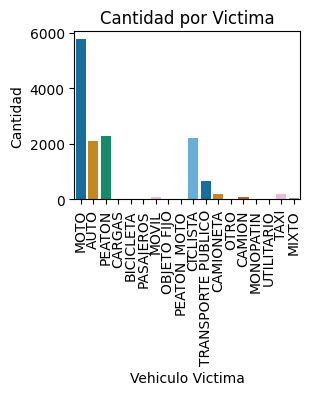

In [168]:
# Gráfico de barras de la frecuencia de los valores en la columna 'VEHICULO_VICTIMA' con colores diferentes
plt.subplot(2, 2, 2)
sns.countplot(x='VICTIMA', data=hechos, hue='VICTIMA', palette='colorblind', legend=False)
plt.title('Cantidad por Victima')
plt.xlabel('Vehiculo Victima')
plt.ylabel('Cantidad')

plt.xticks(rotation=90)  # Rotar los nombres de las columnas en 90 grados

plt.show()

***Análisis de los Datos sobre el Tipo de Víctima en los Siniestros Viales:***

**Distribución de Víctimas por Tipo**

Los datos revelan una distribución variada en cuanto al tipo de víctima involucrada en los siniestros viales. Las motocicletas representan aproximadamente el 23.51% del total de casos, seguidas por peatones con aproximadamente el 9.35%, y ciclistas con aproximadamente el 9.02%. Los autos y el transporte público también tienen una incidencia significativa, representando aproximadamente el 8.64% y 2.77% respectivamente.

**Interpretación y Consideraciones:**

- Tipos de Víctimas Más Comunes: La alta representación de motocicletas, peatones y ciclistas como víctimas sugiere la vulnerabilidad de estos usuarios de la vía y la necesidad de medidas específicas para mejorar su seguridad.

- Víctimas Menos Comunes: Tipos menos frecuentes de víctimas, como monopatines, objetos fijos y cargas, aunque representan una proporción menor del total, también requieren atención debido a sus características específicas y posibles riesgos asociados.

**Conclusiones:**
El análisis porcentual de la distribución de víctimas por tipo resalta la diversidad de usuarios de la vía involucrados en siniestros viales. Este análisis proporciona información valiosa para la identificación de áreas prioritarias de intervención en materia de seguridad vial y el desarrollo de estrategias específicas para proteger a los usuarios más vulnerables de la vía. Además, destaca la importancia de recopilar y analizar datos precisos y detallados para informar eficazmente las políticas y medidas de seguridad vial.

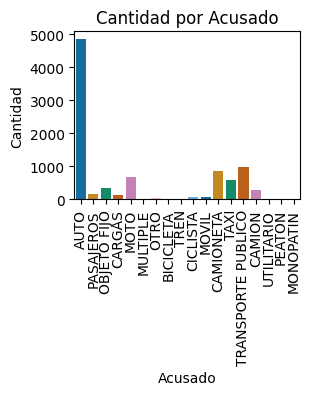

In [170]:
# Gráfico de barras de la frecuencia de los valores en la columna 'VEHICULO_VICTIMA' con colores diferentes
plt.subplot(2, 2, 2)
sns.countplot(x='ACUSADO', data=hechos, hue='ACUSADO', palette='colorblind', legend=False)
plt.title('Cantidad por Acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad')

plt.xticks(rotation=90)  # Rotar los nombres de las columnas en 90 grados

plt.show()

***Análisis de los Datos sobre el Acusado en los Siniestros Viales:***

**Distribución de Acusados Relevantes**

Los datos proporcionados revelan una distribución variada en cuanto a los acusados en los siniestros viales. A continuación se presenta la distribución porcentual de los acusados más relevantes:

- Automóvil: Representa aproximadamente el 52.83% de los casos.
- Transporte Público: Representa aproximadamente el 10.63% de los casos.
- Camioneta: Representa aproximadamente el 9.51% de los casos.
- Motocicleta: Representa aproximadamente el 7.43% de los casos.
- Taxi: Representa aproximadamente el 6.44% de los casos.

**Interpretación y Consideraciones:**

Acusados Más Comunes: Los vehículos particulares, como automóviles, camionetas y motocicletas, así como el transporte público y los taxis, son los acusados más comunes en los siniestros viales, representando una proporción significativa del total de casos. Esto destaca la importancia de implementar políticas públicas específicas dirigidas a mejorar la seguridad vial tanto para los conductores como para los pasajeros de estos vehículos.

**Conclusiones:**

El análisis porcentual de la distribución de acusados en los siniestros viales resalta la importancia de abordar los factores asociados con los vehículos más comunes involucrados en estos eventos. Este enfoque permite una mejor orientación de las políticas públicas y las iniciativas de seguridad vial para reducir la incidencia de siniestros y promover un entorno vial más seguro para todos los usuarios de la vía.

## Guardamos los archivos

En este momento ya hemos terminado nuestro EDA del proyecto, sin embargo procedermos a guardar los dataframes que hemos creado en esta etapa para asi poder manejar una visualizacion de los datos con power BI 

In [ ]:
victimas.to_csv('CSV\\victimas.csv', index=False)
hechos.to_csv('CSV\\hechos.csv')